In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

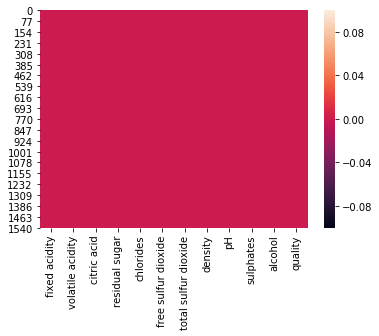

In [6]:
sns.heatmap(df.isna())

In [7]:
df.duplicated().sum()

240

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
"""Exploratory Data Analysis"""

'Exploratory Data Analysis'

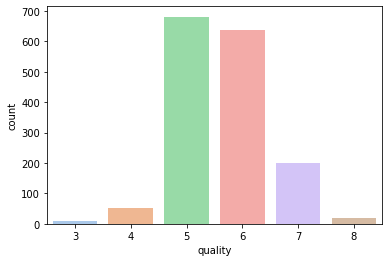

In [13]:
sns.countplot(df.quality,palette='pastel')

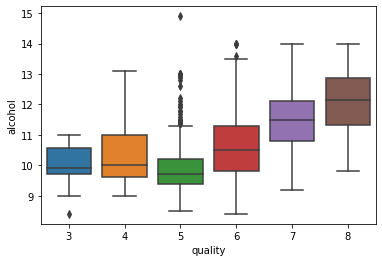

In [14]:
sns.boxplot(df.quality,df.alcohol)

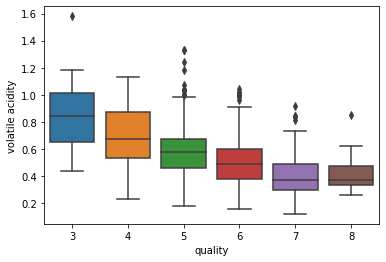

In [15]:
sns.boxplot('quality','volatile acidity',data=df)

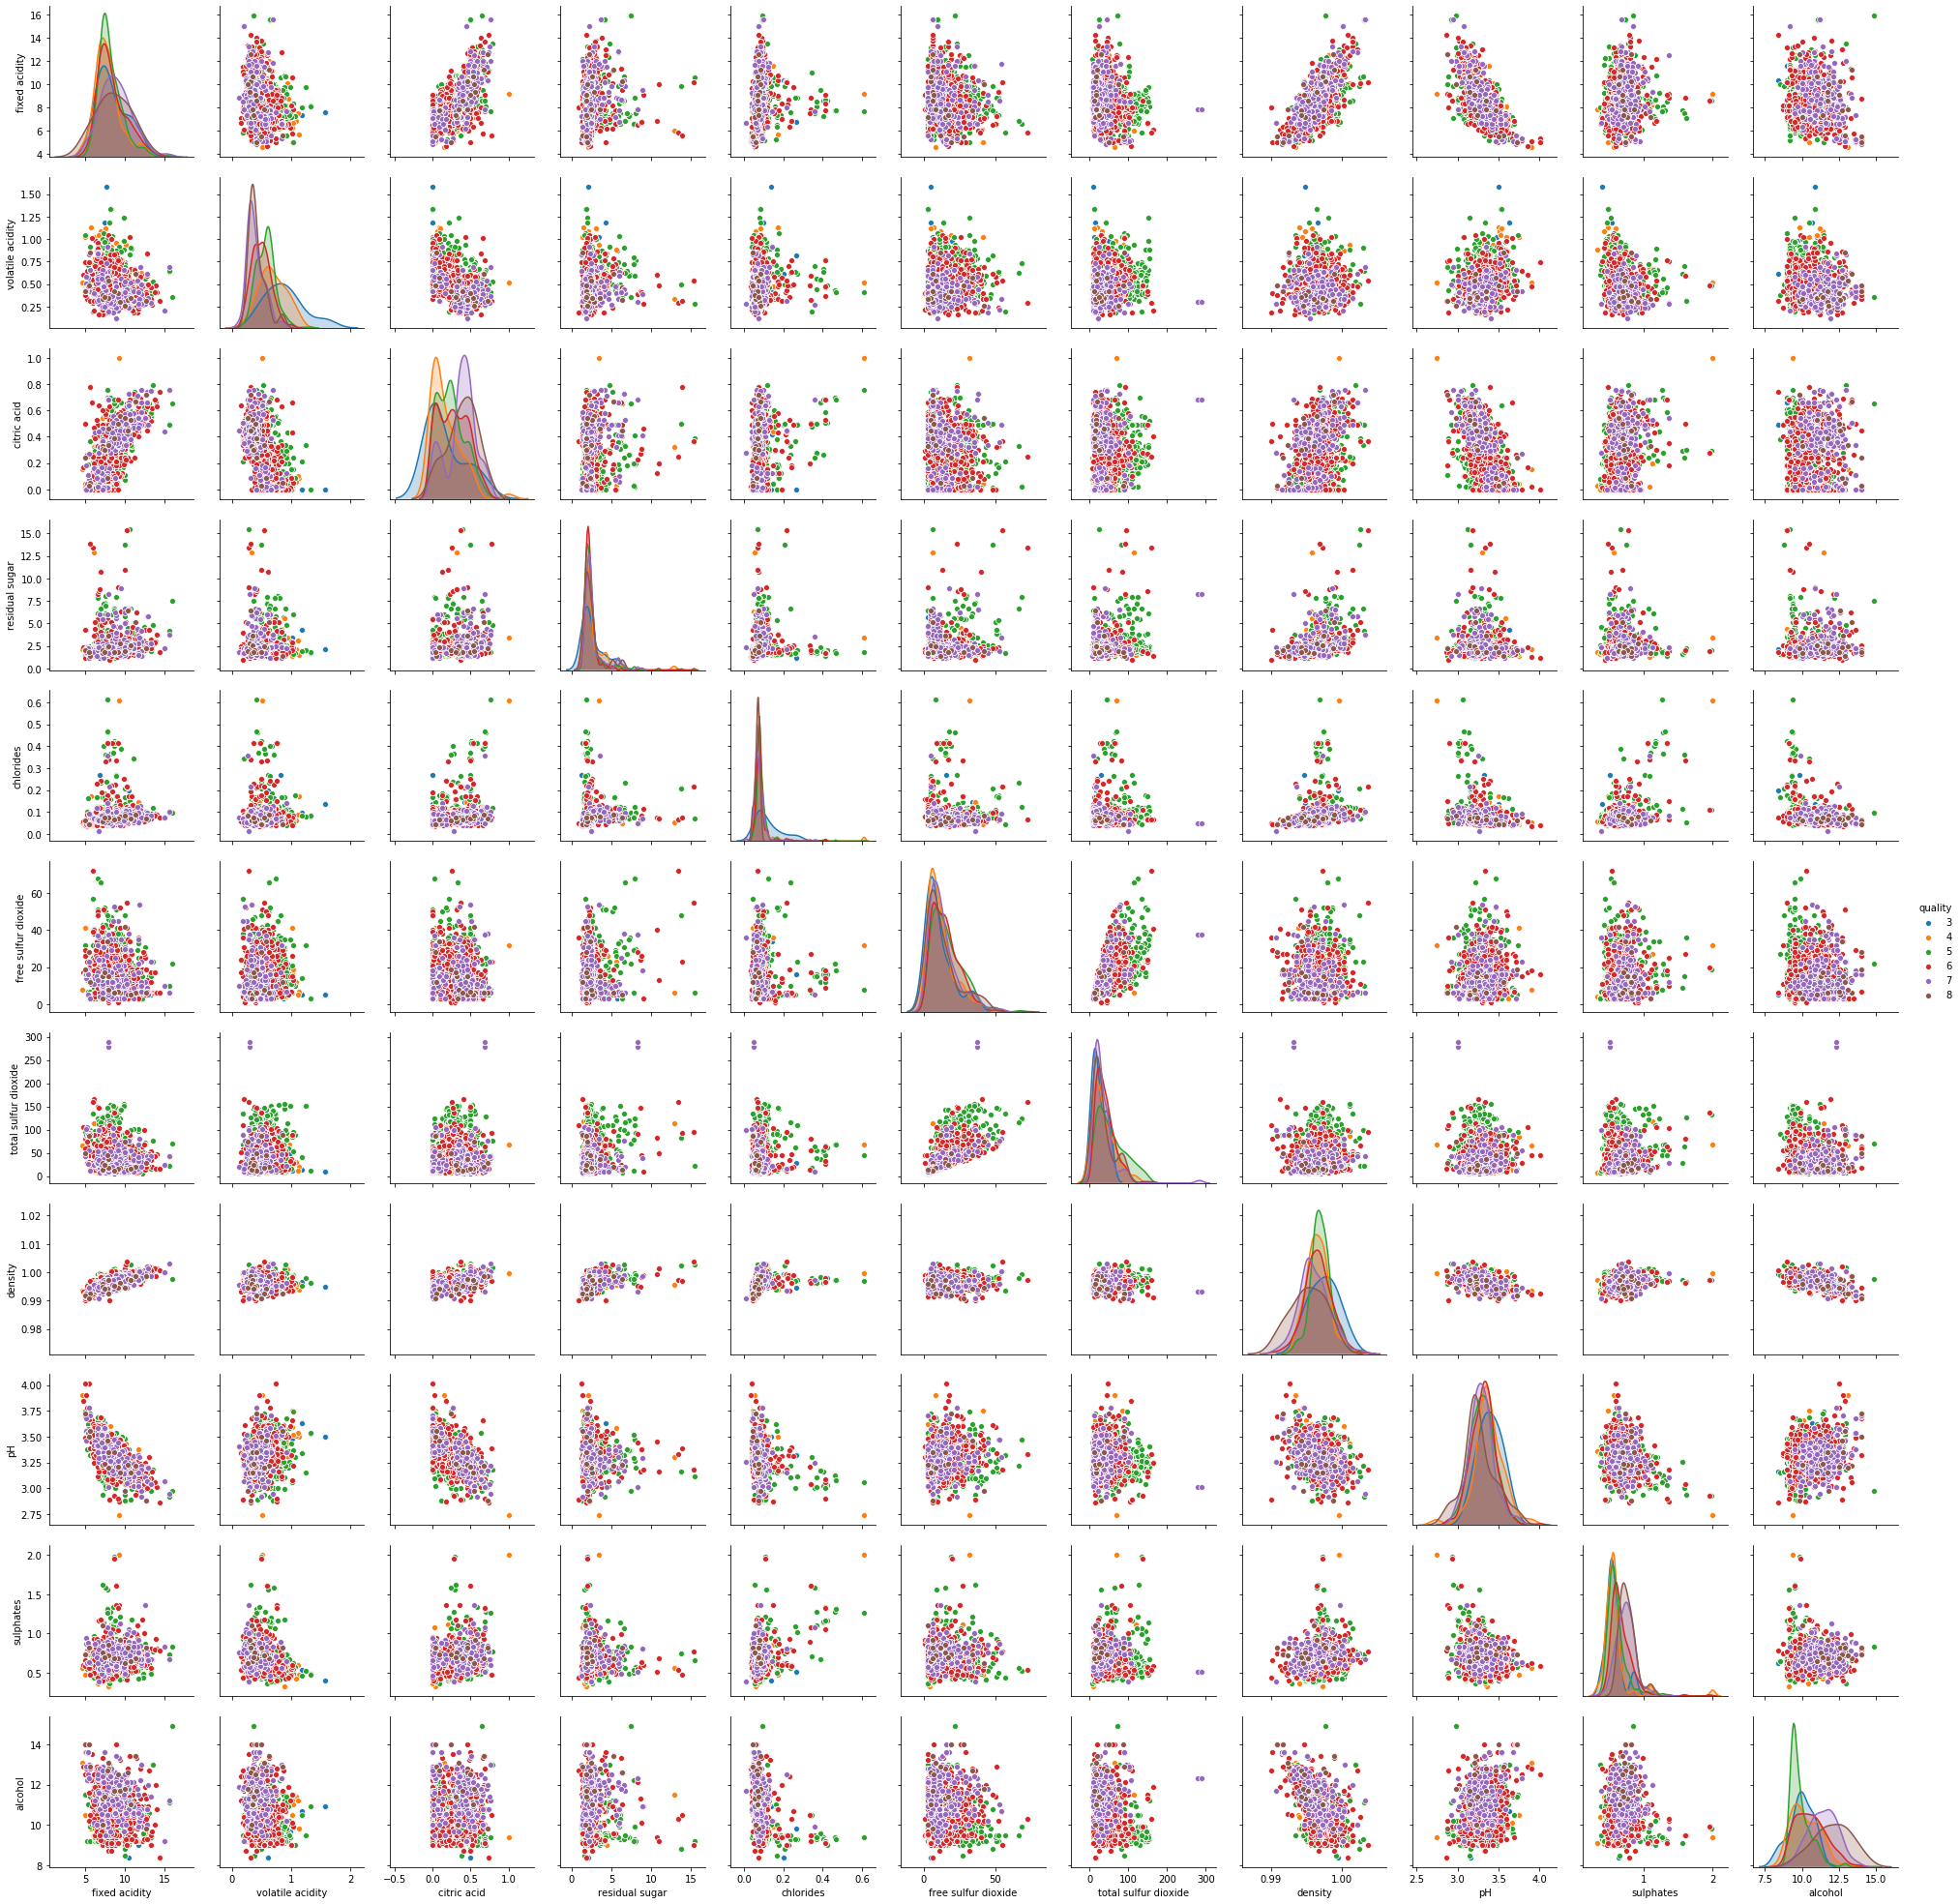

In [16]:
sns.pairplot(df,hue='quality',vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

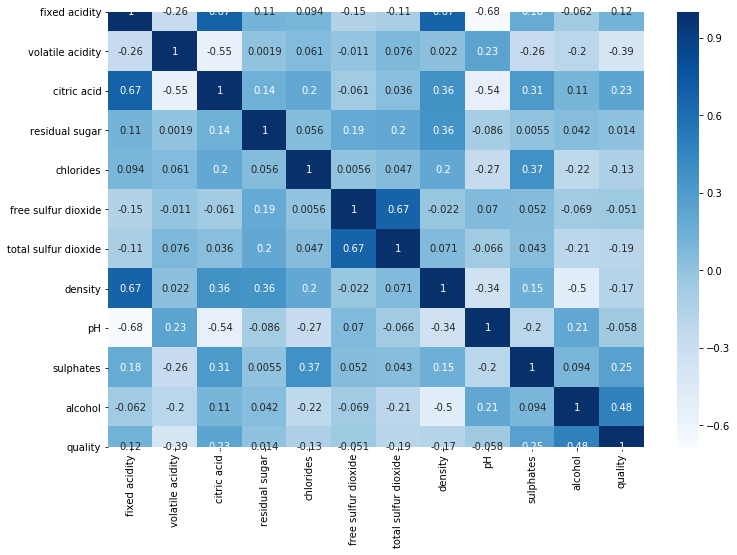

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [18]:
grade=[]
for i in df.quality:
    if i>5:
        grade.append('good')
    else:
        grade.append('bad')
df['grade']=grade

In [19]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
87,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5,bad
1528,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6,good
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5,bad
377,9.4,0.27,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7,good
874,10.4,0.38,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8,7,good


In [20]:
df.grade=[1 if i=='good' else 0 for i in df.grade]

In [21]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
756,6.3,0.98,0.01,2.0,0.057,15.0,33.0,0.99488,3.60,0.46,11.2,6,1
473,9.9,0.35,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6,5,0
744,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5,0
1266,7.2,0.57,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6,1
1208,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,1


In [22]:
# we split the data into train and test set

In [23]:
y=df.grade
x=df.drop('grade',axis=1)

In [24]:
x.shape,y.shape

((1599, 12), (1599,))

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [27]:
"""Model Building"""

'Model Building'

In [28]:
def build_model():
    model=Sequential()
    model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=xtrain.shape[1]))
    model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [29]:
model=KerasClassifier(build_fn=build_model,epochs=300)
acc=cross_val_score(estimator=model,X=xtrain,y=ytrain,cv=3)
mean=acc.mean()

Epoch 1/300
852/852 [==============================] - 1s 1ms/step - loss: 0.6889 - accuracy: 0.7230
Epoch 2/300
852/852 [==============================] - 0s 108us/step - loss: 0.6483 - accuracy: 0.8662
Epoch 3/300
852/852 [==============================] - 0s 150us/step - loss: 0.5072 - accuracy: 0.8850
Epoch 4/300
852/852 [==============================] - 0s 134us/step - loss: 0.3240 - accuracy: 0.9108
Epoch 5/300
852/852 [==============================] - 0s 122us/step - loss: 0.1789 - accuracy: 0.9613
Epoch 6/300
852/852 [==============================] - 0s 116us/step - loss: 0.0806 - accuracy: 0.99530s - loss: 0.0918 - accuracy: 0.99
Epoch 7/300
852/852 [==============================] - 0s 100us/step - loss: 0.0367 - accuracy: 1.0000
Epoch 8/300
852/852 [==============================] - 0s 151us/step - loss: 0.0194 - accuracy: 1.0000
Epoch 9/300
852/852 [==============================] - 0s 299us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 10/300
852/852 [===================

852/852 [==============================] - 0s 76us/step - loss: 3.6942e-05 - accuracy: 1.0000
Epoch 78/300
852/852 [==============================] - 0s 122us/step - loss: 3.5794e-05 - accuracy: 1.0000
Epoch 79/300
852/852 [==============================] - 0s 260us/step - loss: 3.4718e-05 - accuracy: 1.0000
Epoch 80/300
852/852 [==============================] - 0s 131us/step - loss: 3.3670e-05 - accuracy: 1.0000
Epoch 81/300
852/852 [==============================] - 0s 93us/step - loss: 3.2678e-05 - accuracy: 1.0000
Epoch 82/300
852/852 [==============================] - 0s 113us/step - loss: 3.1719e-05 - accuracy: 1.0000
Epoch 83/300
852/852 [==============================] - 0s 104us/step - loss: 3.0798e-05 - accuracy: 1.0000
Epoch 84/300
852/852 [==============================] - 0s 91us/step - loss: 2.9912e-05 - accuracy: 1.0000
Epoch 85/300
852/852 [==============================] - 0s 94us/step - loss: 2.9068e-05 - accuracy: 1.0000
Epoch 86/300
852/852 [=======================

852/852 [==============================] - 0s 73us/step - loss: 6.1345e-06 - accuracy: 1.0000
Epoch 153/300
852/852 [==============================] - 0s 75us/step - loss: 6.0159e-06 - accuracy: 1.0000
Epoch 154/300
852/852 [==============================] - 0s 62us/step - loss: 5.8988e-06 - accuracy: 1.0000
Epoch 155/300
852/852 [==============================] - 0s 60us/step - loss: 5.7848e-06 - accuracy: 1.0000
Epoch 156/300
852/852 [==============================] - 0s 77us/step - loss: 5.6719e-06 - accuracy: 1.0000
Epoch 157/300
852/852 [==============================] - 0s 62us/step - loss: 5.5625e-06 - accuracy: 1.0000
Epoch 158/300
852/852 [==============================] - 0s 83us/step - loss: 5.4563e-06 - accuracy: 1.0000
Epoch 159/300
852/852 [==============================] - 0s 100us/step - loss: 5.3505e-06 - accuracy: 1.0000
Epoch 160/300
852/852 [==============================] - 0s 93us/step - loss: 5.2495e-06 - accuracy: 1.0000
Epoch 161/300
852/852 [==================

852/852 [==============================] - 0s 95us/step - loss: 1.5874e-06 - accuracy: 1.0000
Epoch 228/300
852/852 [==============================] - 0s 108us/step - loss: 1.5612e-06 - accuracy: 1.0000
Epoch 229/300
852/852 [==============================] - 0s 104us/step - loss: 1.5351e-06 - accuracy: 1.0000
Epoch 230/300
852/852 [==============================] - 0s 94us/step - loss: 1.5098e-06 - accuracy: 1.0000
Epoch 231/300
852/852 [==============================] - 0s 95us/step - loss: 1.4842e-06 - accuracy: 1.0000
Epoch 232/300
852/852 [==============================] - 0s 100us/step - loss: 1.4597e-06 - accuracy: 1.0000
Epoch 233/300
852/852 [==============================] - 0s 96us/step - loss: 1.4355e-06 - accuracy: 1.0000
Epoch 234/300
852/852 [==============================] - 0s 252us/step - loss: 1.4116e-06 - accuracy: 1.0000
Epoch 235/300
852/852 [==============================] - 0s 217us/step - loss: 1.3883e-06 - accuracy: 1.0000
Epoch 236/300
852/852 [==============

853/853 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.6600
Epoch 2/300
853/853 [==============================] - 0s 81us/step - loss: 0.6565 - accuracy: 0.8230
Epoch 3/300
853/853 [==============================] - 0s 71us/step - loss: 0.5346 - accuracy: 0.8441
Epoch 4/300
853/853 [==============================] - 0s 59us/step - loss: 0.3597 - accuracy: 0.9050
Epoch 5/300
853/853 [==============================] - 0s 63us/step - loss: 0.2021 - accuracy: 0.9578
Epoch 6/300
853/853 [==============================] - 0s 63us/step - loss: 0.0962 - accuracy: 0.9953
Epoch 7/300
853/853 [==============================] - 0s 60us/step - loss: 0.0449 - accuracy: 1.0000
Epoch 8/300
853/853 [==============================] - 0s 69us/step - loss: 0.0235 - accuracy: 1.0000
Epoch 9/300
853/853 [==============================] - 0s 64us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 10/300
853/853 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 1.00

853/853 [==============================] - 0s 98us/step - loss: 5.3951e-05 - accuracy: 1.0000
Epoch 78/300
853/853 [==============================] - 0s 101us/step - loss: 5.2322e-05 - accuracy: 1.0000
Epoch 79/300
853/853 [==============================] - 0s 98us/step - loss: 5.0761e-05 - accuracy: 1.0000
Epoch 80/300
853/853 [==============================] - 0s 101us/step - loss: 4.9257e-05 - accuracy: 1.0000
Epoch 81/300
853/853 [==============================] - 0s 100us/step - loss: 4.7843e-05 - accuracy: 1.0000
Epoch 82/300
853/853 [==============================] - 0s 111us/step - loss: 4.6435e-05 - accuracy: 1.0000
Epoch 83/300
853/853 [==============================] - 0s 98us/step - loss: 4.5095e-05 - accuracy: 1.0000
Epoch 84/300
853/853 [==============================] - 0s 109us/step - loss: 4.3805e-05 - accuracy: 1.0000
Epoch 85/300
853/853 [==============================] - 0s 213us/step - loss: 4.2578e-05 - accuracy: 1.0000
Epoch 86/300
853/853 [======================

853/853 [==============================] - 0s 71us/step - loss: 9.1171e-06 - accuracy: 1.0000
Epoch 153/300
853/853 [==============================] - 0s 67us/step - loss: 8.9410e-06 - accuracy: 1.0000
Epoch 154/300
853/853 [==============================] - 0s 69us/step - loss: 8.7676e-06 - accuracy: 1.0000
Epoch 155/300
853/853 [==============================] - 0s 63us/step - loss: 8.6003e-06 - accuracy: 1.0000
Epoch 156/300
853/853 [==============================] - 0s 74us/step - loss: 8.4354e-06 - accuracy: 1.0000
Epoch 157/300
853/853 [==============================] - 0s 115us/step - loss: 8.2765e-06 - accuracy: 1.0000
Epoch 158/300
853/853 [==============================] - 0s 153us/step - loss: 8.1172e-06 - accuracy: 1.0000
Epoch 159/300
853/853 [==============================] - 0s 149us/step - loss: 7.9641e-06 - accuracy: 1.0000
Epoch 160/300
853/853 [==============================] - 0s 96us/step - loss: 7.8111e-06 - accuracy: 1.0000
Epoch 161/300
853/853 [================

853/853 [==============================] - 0s 122us/step - loss: 2.4280e-06 - accuracy: 1.0000
Epoch 227/300
853/853 [==============================] - 0s 144us/step - loss: 2.3878e-06 - accuracy: 1.0000
Epoch 228/300
853/853 [==============================] - 0s 177us/step - loss: 2.3484e-06 - accuracy: 1.0000
Epoch 229/300
853/853 [==============================] - 0s 369us/step - loss: 2.3098e-06 - accuracy: 1.0000
Epoch 230/300
853/853 [==============================] - 0s 138us/step - loss: 2.2712e-06 - accuracy: 1.0000
Epoch 231/300
853/853 [==============================] - 0s 114us/step - loss: 2.2339e-06 - accuracy: 1.0000
Epoch 232/300
853/853 [==============================] - 0s 77us/step - loss: 2.1970e-06 - accuracy: 1.0000
Epoch 233/300
853/853 [==============================] - 0s 63us/step - loss: 2.1606e-06 - accuracy: 1.0000
Epoch 234/300
853/853 [==============================] - 0s 70us/step - loss: 2.1254e-06 - accuracy: 1.0000
Epoch 235/300
853/853 [=============

853/853 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.7151
Epoch 2/300
853/853 [==============================] - 0s 62us/step - loss: 0.6567 - accuracy: 0.8664
Epoch 3/300
853/853 [==============================] - 0s 62us/step - loss: 0.5238 - accuracy: 0.8605
Epoch 4/300
853/853 [==============================] - 0s 63us/step - loss: 0.3214 - accuracy: 0.9191
Epoch 5/300
853/853 [==============================] - 0s 64us/step - loss: 0.1534 - accuracy: 0.9789
Epoch 6/300
853/853 [==============================] - 0s 62us/step - loss: 0.0619 - accuracy: 1.0000
Epoch 7/300
853/853 [==============================] - 0s 60us/step - loss: 0.0280 - accuracy: 1.0000
Epoch 8/300
853/853 [==============================] - 0s 62us/step - loss: 0.0157 - accuracy: 1.0000
Epoch 9/300
853/853 [==============================] - 0s 59us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 10/300
853/853 [==============================] - 0s 59us/step - loss: 0.0074 - accuracy:

Epoch 78/300
853/853 [==============================] - 0s 116us/step - loss: 6.1981e-05 - accuracy: 1.0000
Epoch 79/300
853/853 [==============================] - 0s 101us/step - loss: 6.0161e-05 - accuracy: 1.0000
Epoch 80/300
853/853 [==============================] - 0s 100us/step - loss: 5.8445e-05 - accuracy: 1.0000
Epoch 81/300
853/853 [==============================] - 0s 217us/step - loss: 5.6766e-05 - accuracy: 1.0000
Epoch 82/300
853/853 [==============================] - 0s 123us/step - loss: 5.5165e-05 - accuracy: 1.0000
Epoch 83/300
853/853 [==============================] - 0s 139us/step - loss: 5.3639e-05 - accuracy: 1.0000
Epoch 84/300
853/853 [==============================] - 0s 320us/step - loss: 5.2132e-05 - accuracy: 1.0000
Epoch 85/300
853/853 [==============================] - 0s 200us/step - loss: 5.0702e-05 - accuracy: 1.0000
Epoch 86/300
853/853 [==============================] - 0s 112us/step - loss: 4.9302e-05 - accuracy: 1.0000
Epoch 87/300
853/853 [======

853/853 [==============================] - 0s 62us/step - loss: 1.1220e-05 - accuracy: 1.0000
Epoch 153/300
853/853 [==============================] - 0s 70us/step - loss: 1.1004e-05 - accuracy: 1.0000
Epoch 154/300
853/853 [==============================] - 0s 71us/step - loss: 1.0797e-05 - accuracy: 1.0000
Epoch 155/300
853/853 [==============================] - 0s 62us/step - loss: 1.0593e-05 - accuracy: 1.0000
Epoch 156/300
853/853 [==============================] - 0s 69us/step - loss: 1.0394e-05 - accuracy: 1.0000
Epoch 157/300
853/853 [==============================] - 0s 61us/step - loss: 1.0200e-05 - accuracy: 1.0000
Epoch 158/300
853/853 [==============================] - 0s 112us/step - loss: 1.0008e-05 - accuracy: 1.0000
Epoch 159/300
853/853 [==============================] - 0s 243us/step - loss: 9.8217e-06 - accuracy: 1.0000
Epoch 160/300
853/853 [==============================] - 0s 124us/step - loss: 9.6386e-06 - accuracy: 1.0000
Epoch 161/300
853/853 [================

853/853 [==============================] - 0s 151us/step - loss: 2.9924e-06 - accuracy: 1.0000
Epoch 228/300
853/853 [==============================] - 0s 101us/step - loss: 2.9435e-06 - accuracy: 1.0000
Epoch 229/300
853/853 [==============================] - 0s 83us/step - loss: 2.8958e-06 - accuracy: 1.0000
Epoch 230/300
853/853 [==============================] - 0s 84us/step - loss: 2.8480e-06 - accuracy: 1.0000
Epoch 231/300
853/853 [==============================] - 0s 75us/step - loss: 2.8015e-06 - accuracy: 1.0000
Epoch 232/300
853/853 [==============================] - 0s 69us/step - loss: 2.7558e-06 - accuracy: 1.0000
Epoch 233/300
853/853 [==============================] - 0s 73us/step - loss: 2.7108e-06 - accuracy: 1.0000
Epoch 234/300
853/853 [==============================] - 0s 69us/step - loss: 2.6669e-06 - accuracy: 1.0000
Epoch 235/300
853/853 [==============================] - 0s 97us/step - loss: 2.6231e-06 - accuracy: 1.0000
Epoch 236/300
853/853 [=================

In [30]:
print('Accuracy Mean: '+str(mean))

Accuracy Mean: 1.0


In [31]:
model.fit(xtrain,ytrain,batch_size=10,epochs=100)

Epoch 1/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5385 - accuracy: 0.8366: 1s - loss: 0.6511 - accu
Epoch 2/100
1279/1279 [==============================] - 0s 284us/step - loss: 0.0613 - accuracy: 0.9953
Epoch 3/100
1279/1279 [==============================] - 0s 368us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 4/100
1279/1279 [==============================] - 1s 459us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 5/100
1279/1279 [==============================] - 0s 316us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/100
1279/1279 [==============================] - 0s 306us/step - loss: 7.9435e-04 - accuracy: 1.0000
Epoch 7/100
1279/1279 [==============================] - 1s 561us/step - loss: 5.4386e-04 - accuracy: 1.0000
Epoch 8/100
1279/1279 [==============================] - 0s 283us/step - loss: 3.9459e-04 - accuracy: 1.0000
Epoch 9/100
1279/1279 [==============================] - 0s 237us/step - loss: 2.9876e-04 - accuracy: 1.0000
Epoch 10/100
12

1279/1279 [==============================] - 1s 455us/step - loss: 3.9657e-07 - accuracy: 1.0000
Epoch 76/100
1279/1279 [==============================] - 1s 520us/step - loss: 3.6864e-07 - accuracy: 1.0000
Epoch 77/100
1279/1279 [==============================] - 0s 227us/step - loss: 3.4265e-07 - accuracy: 1.0000
Epoch 78/100
1279/1279 [==============================] - 1s 541us/step - loss: 3.1860e-07 - accuracy: 1.0000
Epoch 79/100
1279/1279 [==============================] - 1s 456us/step - loss: 2.9621e-07 - accuracy: 1.0000
Epoch 80/100
1279/1279 [==============================] - 0s 287us/step - loss: 2.7553e-07 - accuracy: 1.0000
Epoch 81/100
1279/1279 [==============================] - 1s 397us/step - loss: 2.5628e-07 - accuracy: 1.0000
Epoch 82/100
1279/1279 [==============================] - 0s 296us/step - loss: 2.3840e-07 - accuracy: 1.0000
Epoch 83/100
1279/1279 [==============================] - 0s 223us/step - loss: 2.2183e-07 - accuracy: 1.0000
Epoch 84/100
1279/1279 

In [32]:
pred=model.predict(xtest)

In [33]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       179

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



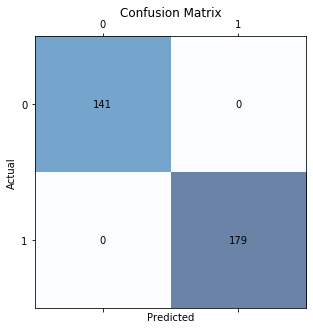

In [34]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

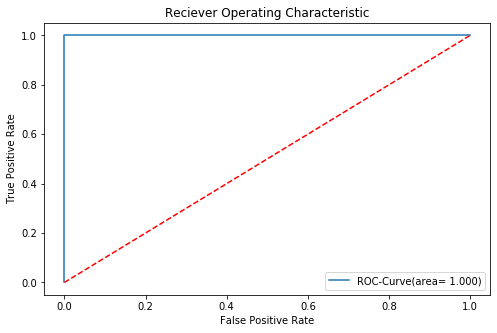

In [35]:
plt.figure(figsize=(8,5))
auc=roc_auc_score(ytest,pred)
fpr,tpr,thr=roc_curve(ytest,model.predict_proba(xtest)[:,1])
plt.plot(fpr,tpr,label='ROC-Curve(area= %0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()